In [1]:
#! pip install mlxtend
#! pip install squarify
! pip install wordcloud

In [127]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

# for defining path
import os
os.chdir(r"C:\important_files\casestuyfiles\market-basket-optimization")

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx

In [2]:
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

**Visualization**

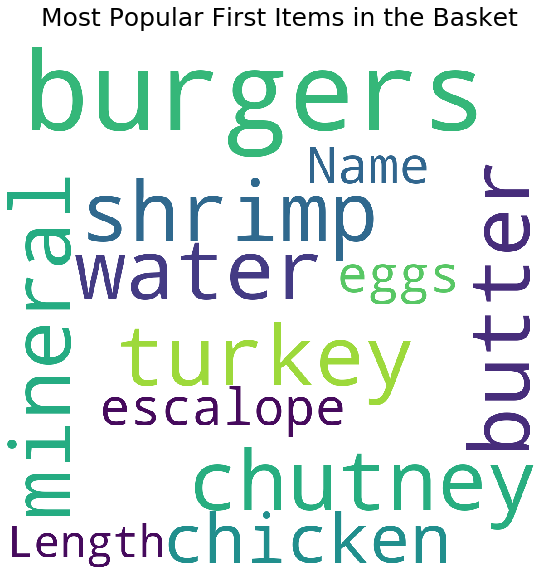

In [27]:
plt.figure(figsize = (10,10))
wordcloud = WordCloud(background_color='white',
                     width = 1200,
                     height = 1200,
                     max_words=12).generate(str(data[0]));

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular First Items in the Basket',fontsize = 25)
plt.show()

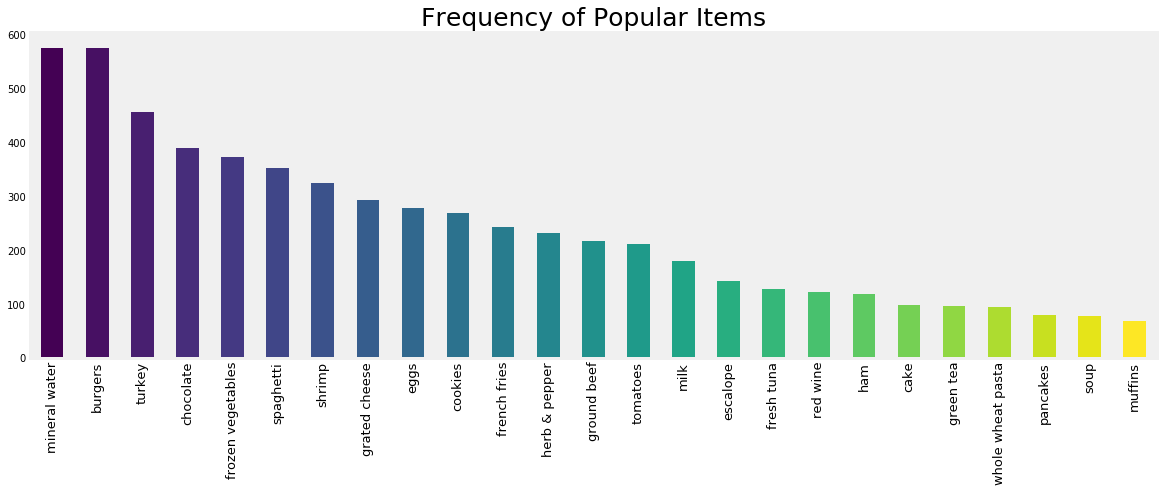

In [43]:
#Frequency of popular item being purchased
plt.figure(figsize=(18,6))
color = plt.cm.viridis(np.linspace(0, 1, 25))
data[0].value_counts().head(25).plot(kind='bar',color=color)
plt.title('Frequency of Popular Items',fontsize=25)
plt.xticks(rotation = 90,fontsize=13)
plt.grid()
plt.show()

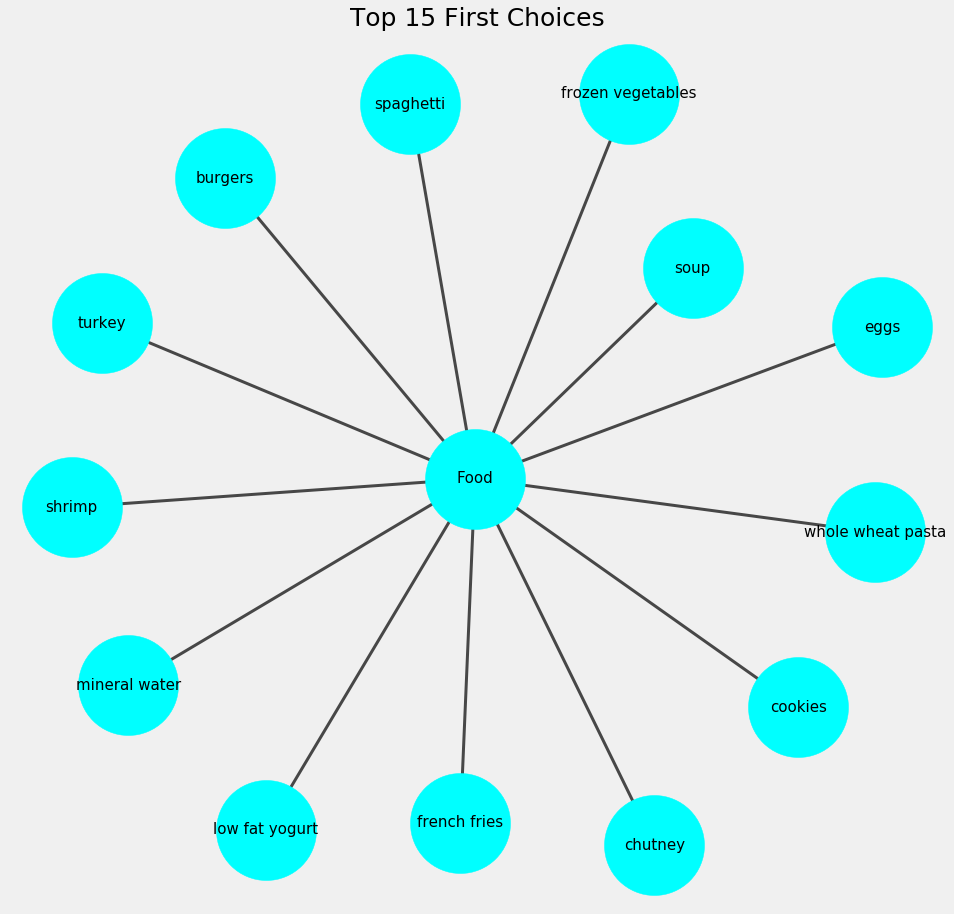

In [111]:
#Top 15 choices for FOOD
# Network graph
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
#Creating network Keys and Values
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(food)
color=plt.cm.cool(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 10000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.7, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 15, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 25)
plt.show()

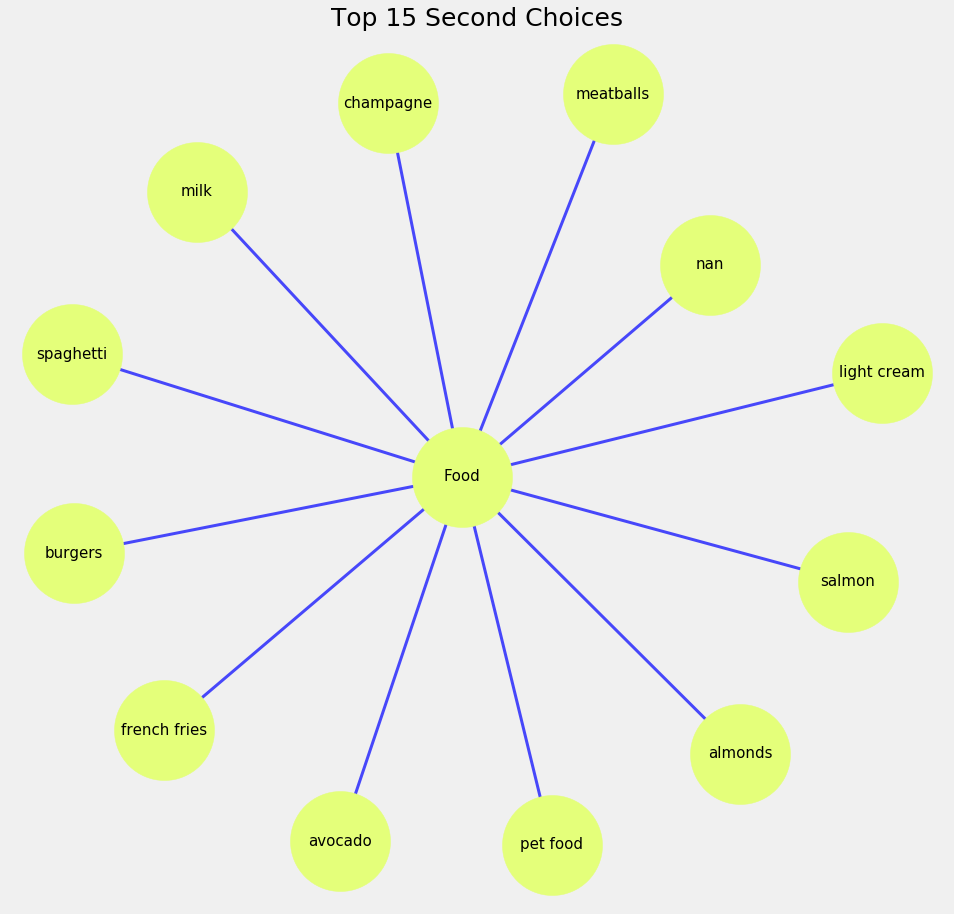

In [112]:
#Top 15 choices for FOOD
# Network graph
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
#Creating network Keys and Values
food = nx.from_pandas_edgelist(food, source = 'food', target = 1, edge_attr = True)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(food)
color=plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 10000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.7, edge_color = 'blue')
nx.draw_networkx_labels(food, pos, font_size = 15, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 25)
plt.show()

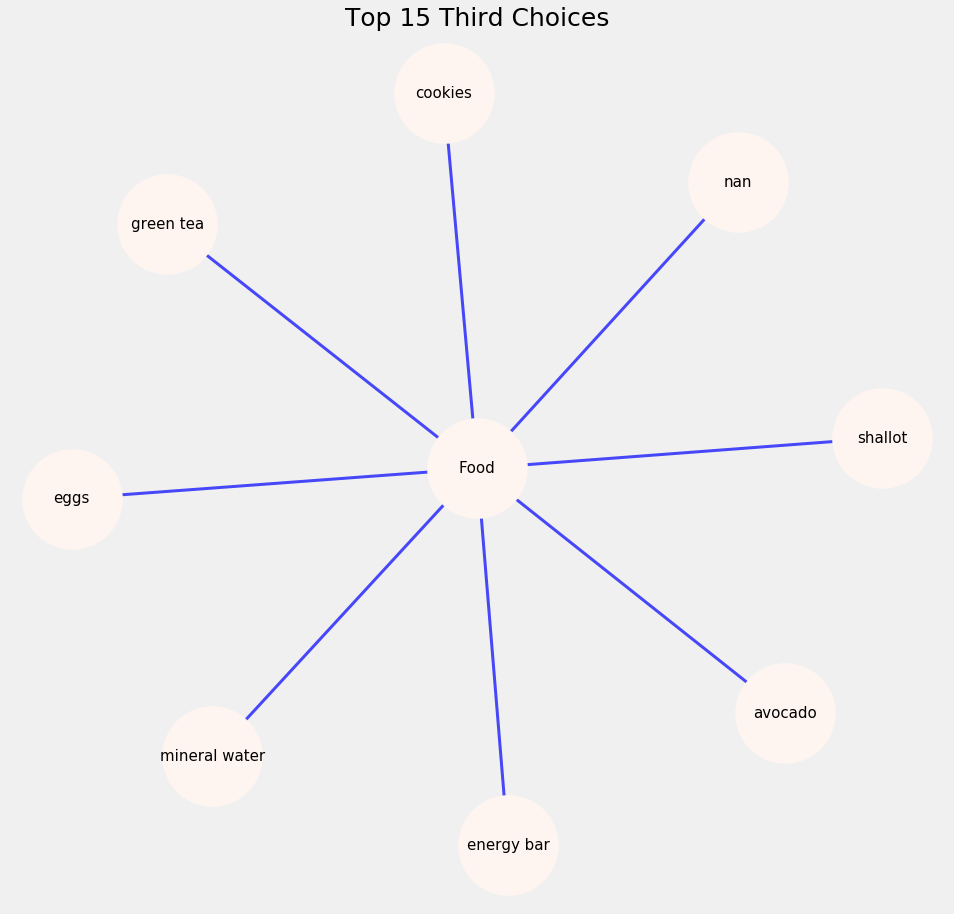

In [117]:
#Top 15 choices for FOOD
# Network graph
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
#Creating network Keys and Values
food = nx.from_pandas_edgelist(food, source = 'food', target = 2, edge_attr = True)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(food)
color=plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 10000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.7, edge_color = 'blue')
nx.draw_networkx_labels(food, pos, font_size = 15, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Third Choices', fontsize = 25)
plt.show()

In [96]:
(food.edges)

EdgeView([('Food', 'shrimp'), ('Food', 'burgers'), ('Food', 'chutney'), ('Food', 'turkey'), ('Food', 'mineral water'), ('Food', 'low fat yogurt'), ('Food', 'whole wheat pasta'), ('Food', 'soup'), ('Food', 'frozen vegetables'), ('Food', 'french fries'), ('Food', 'eggs'), ('Food', 'cookies'), ('Food', 'spaghetti')])

In [125]:
# For each customers, appeding shopping items to a single list
print(data.values)
trans = []
for each_customer in range(0, 7501):
    trans.append([str(data.values[each_customer,items]) for items in range(0, 20)])
    
# conveting it into an numpy array
trans = np.array(trans)
print('###############################')
print('New list of items ',trans[0])

[['shrimp' 'almonds' 'avocado' ... 'spinach' 'olive oil' 'Food']
 ['burgers' 'meatballs' 'eggs' ... nan nan 'Food']
 ['chutney' nan nan ... nan nan 'Food']
 ...
 ['chicken' nan nan ... nan nan 'Food']
 ['escalope' 'green tea' nan ... nan nan 'Food']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... nan nan 'Food']]
###############################
New list of items  ['shrimp' 'almonds' 'avocado' 'vegetables mix' 'green grapes'
 'whole weat flour' 'yams' 'cottage cheese' 'energy drink' 'tomato juice'
 'low fat yogurt' 'green tea' 'honey' 'salad' 'mineral water' 'salmon'
 'antioxydant juice' 'frozen smoothie' 'spinach' 'olive oil']


In [130]:
#Using and TransactionEncoder object, 
#we can transform this dataset into an array format 
#suitable for typical machine learning APIs

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [131]:
# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

(7501, 40)

In [132]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [136]:
#Now, let us return the items and itemsets with at least 5% support:
frequent_itemsets = apriori(data, min_support = 0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length']>1]

,support,itemsets,length
38,0.024397,"(burgers, mineral water)",2
39,0.052660,"(chocolate, mineral water)",2
40,0.035729,"(frozen vegetables, mineral water)",2
41,0.059725,"(spaghetti, mineral water)",2
42,0.023597,"(shrimp, mineral water)",2
43,0.050927,"(eggs, mineral water)",2
44,0.033729,"(french fries, mineral water)",2
45,0.040928,"(ground beef, mineral water)",2
46,0.024397,"(mineral water, tomatoes)",2
47,0.047994,"(mineral water, milk)",2


In [139]:
# Association Rules Mining to generate the rules with their coresponding support
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules[(rules['support']>=0.02)&(rules['confidence']>=0.2)].head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
4,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
6,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
7,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
8,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144
10,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
11,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
12,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
